# Using the Compressor

2025-02-12

From the looks of the figures, the compressor function compresses the value range using a sigmoid like function. However, it has a much wider range than a usual logistic function.

/var/folders/_3/_n1c5rnx5pzd_v7dv5vg2_nr0000gn/T/ipykernel_31811/3269080932.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/var/folders/_3/_n1c5rnx5pzd_v7dv5vg2_nr0000gn/T/ipykernel_31811/3269080932.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


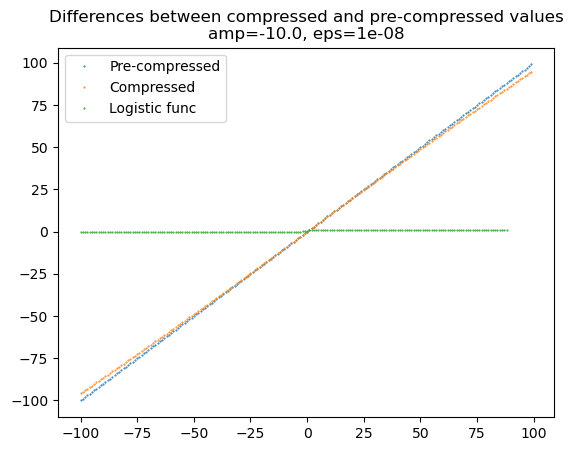

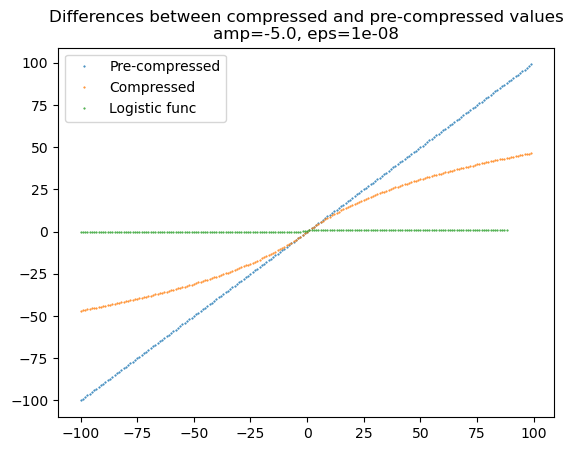

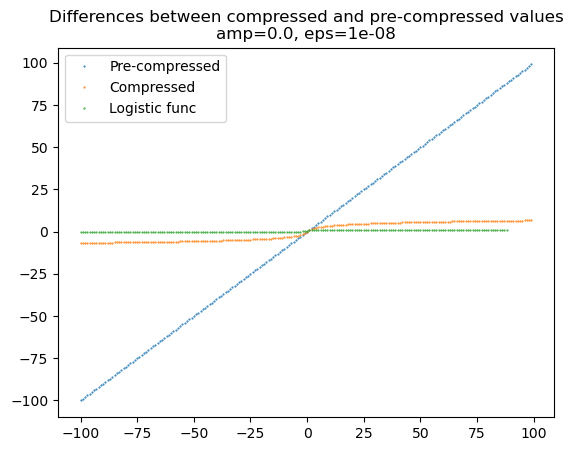

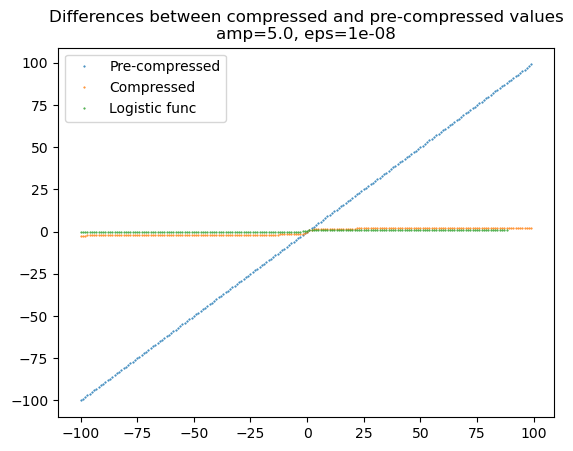

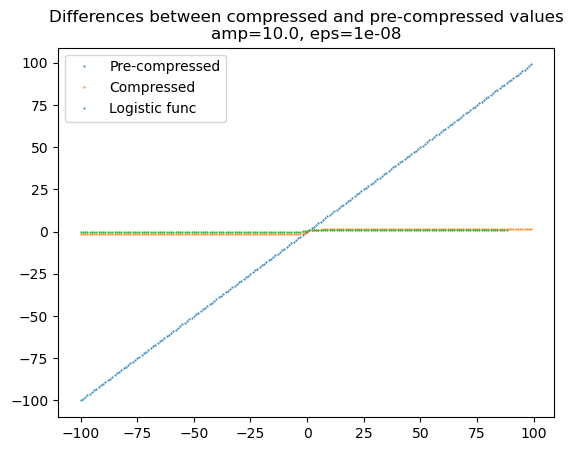

In [41]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def compression_func(x, amp=None, eps=None):
    if amp is None: amp = 0
    if eps is None: eps = 1e-8

    slope = torch.tensor(0.7 * amp)
    slope_ = torch.exp(slope)

    output = torch.sign(x) * torch.log(torch.abs(x) * slope_ + 1.0) / (torch.log(slope_ + 1.0) + eps)

    return output

def logistic_func(x):
    x = torch.tensor(x)
    x = torch.exp(x)
    # output = torch.log(x) / torch.log1p(x)
    output = x / (1+x)
    return output


def plot_diff(amp=None, eps=None):
    start, stop = -100, 100
    inputs = torch.arange(start, stop, step=1)
    fig, ax = plt.subplots()
    ax.set_title(f"Differences between compressed and pre-compressed values\namp={amp}, eps={eps}")

    # Pre-compressed values
    outputs_1 = inputs
    ax.plot(inputs, outputs_1, ".", markersize=1, label="Pre-compressed")

    # Compressed values
    outputs_2 = compression_func(inputs, amp=amp, eps=eps)
    ax.plot(inputs, outputs_2, ".", markersize=1, label="Compressed")

    # Sigmoid func definition
    outputs_3 = logistic_func(inputs)
    ax.plot(inputs, outputs_3, ".", markersize=1, label="Logistic func")

    # Artists
    ax.legend()
    fig.show()

for amp, eps in [(amp, eps) for amp in np.linspace(-10, 10, 5) for eps in [1e-8]]:
    plot_diff(amp, eps)


